In [52]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from tqdm import tqdm
import matplotlib as mpl

np.random.seed(0)
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.usetex'] = False
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


d = 10
r = 0.04
s0 = 40
K = 40
T = 1/2
# sigma = np.eye(d)
steps = 1000
dt = T/steps
paths = 10000
sigma = np.random.rand(d, d)

In [87]:
def monte_carlo(r, T, sigma, s0, d, paths):
    X = np.zeros((d, paths))
    sigma_s = (sigma**2).sum(axis=1).reshape(-1,1)
    W = np.random.normal(0, T, (d, paths))
    dW = sigma.T @ W
    for i in range(d):
        # ic(dW.shape)
        X[i,:] = s0 * np.exp(r*T + dW[i,:])
        X[i,:] *= np.exp(-0.5 * sigma_s[i] * T)
    return X

X = monte_carlo(r, T, sigma, s0, d, paths)

In [88]:
path_range = np.linspace(10, 100000, 100, dtype=int)
res = []
for p in tqdm(path_range):
    X = monte_carlo(r, T, sigma, s0, d, p)
    # S = X.mean(axis=1)
    Xav= X.mean(axis=0)

    pi_av = np.exp(-r*T)*np.maximum(K-Xav, 0).mean()
    res.append(pi_av)

100%|██████████| 100/100 [00:01<00:00, 76.06it/s]


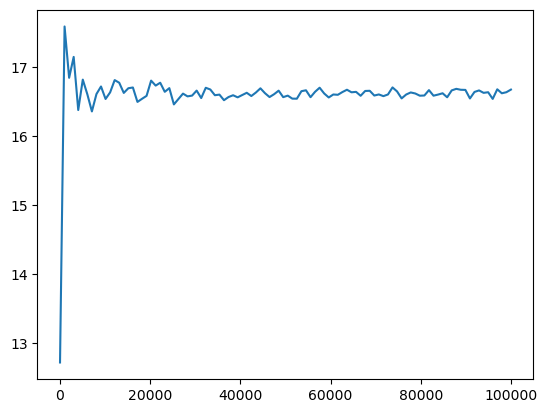

In [89]:
plt.plot(path_range, res)

In [90]:
var = []
s0 = 40
path_range = [100,1000,10000]
for p in path_range:
    res= []
    for _ in range(1000):
        X = monte_carlo(r, T, sigma, s0, d, 1000)
        Xav = X.mean(axis=0)
        pi_av = np.exp(-r*T)*np.maximum(K-Xav, 0).mean()
        res.append(pi_av)
    var.append(np.var(res))

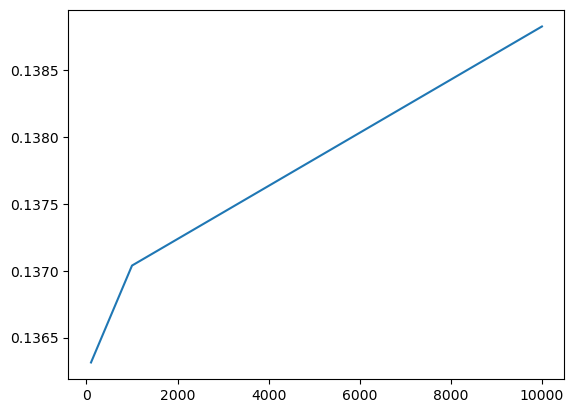

In [91]:
plt.plot(path_range, var)

In [93]:
var = []
s0 = 33
for p in tqdm(path_range):
    res=[]
    for _ in range(100):
        X = monte_carlo(r, T, sigma, s0, d, 10000)
        Xav = X.mean(axis=0)
        pi_av = np.exp(-r*T)*np.maximum(K-Xav, 0).mean()
        res.append(pi_av)
    var.append(np.var(res))

100%|██████████| 3/3 [00:00<00:00,  4.08it/s]


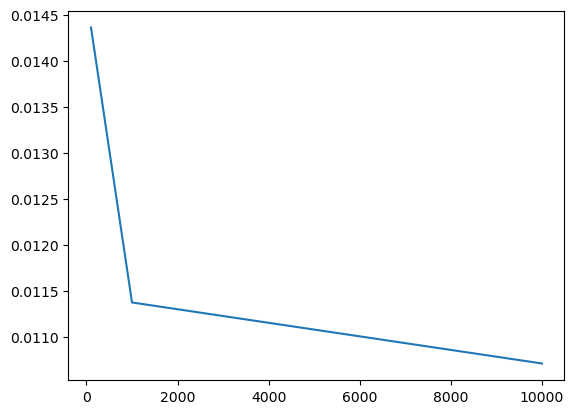

In [94]:
plt.plot(path_range, var)